In [1]:
from dotenv import load_dotenv
from os import getenv
import requests
import praw
import pandas as pd

In [2]:
load_dotenv()

APP_NAME = getenv('APP_NAME')
APP_ID = getenv('APP_ID')
APP_SECRET = getenv('APP_SECRET')
USERNAME = getenv('REDDIT_USERNAME')
PASSWORD = getenv('REDDIT_PASSWORD')


In [3]:
print(USERNAME)

Beatrice359


In [4]:
auth = requests.auth.HTTPBasicAuth(APP_ID, APP_SECRET)

data = {
    'grant_type': 'password',
    'username': USERNAME,
    'password': PASSWORD
}

headers = {'User-Agent': f'windows:{APP_NAME}:v1.0 (by /u/{USERNAME})'}

res = requests.post(
    'https://www.reddit.com/api/v1/access_token', # OAuth2
    auth=auth,
    data=data,
    headers=headers
)

print(res.status_code)

200


In [5]:
TOKEN = res.json()['access_token']
headers = {**headers, **{'Authorization': f'bearer {TOKEN}'}}

In [6]:
res = requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)
print(res.status_code)

200


In [7]:
res

<Response [200]>

In [8]:
res.json()

{'is_employee': False,
 'seen_layout_switch': False,
 'has_visited_new_profile': False,
 'pref_no_profanity': True,
 'has_external_account': False,
 'pref_geopopular': '',
 'seen_redesign_modal': False,
 'pref_show_trending': True,
 'subreddit': {'default_set': True,
  'user_is_contributor': False,
  'banner_img': '',
  'restrict_posting': True,
  'user_is_banned': False,
  'free_form_reports': True,
  'community_icon': None,
  'show_media': True,
  'icon_color': '#FF99AA',
  'user_is_muted': None,
  'display_name': 'u_Beatrice359',
  'header_img': None,
  'title': '',
  'coins': 0,
  'previous_names': [],
  'over_18': False,
  'icon_size': [256, 256],
  'primary_color': '',
  'icon_img': 'https://www.redditstatic.com/avatars/defaults/v2/avatar_default_0.png',
  'description': '',
  'allowed_media_in_comments': [],
  'submit_link_label': '',
  'header_size': None,
  'restrict_commenting': False,
  'subscribers': 0,
  'submit_text_label': '',
  'is_default_icon': True,
  'link_flair_pos

In [9]:
import requests
import pandas as pd
from datetime import datetime

# function to convert responses to dataframes
def df_from_reddit(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()



    for post in res.json()['data']['children']:
        new_row = {
            'subreddit': post['data']['subreddit'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind']
        }
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


    return df




In [10]:
UK = pd.DataFrame()
params = {'limit': 100}


link2 = requests.get("https://oauth.reddit.com/r/unitedkingdom/search/?q=housing%20price&restrict_sr=1",
                       headers=headers,
                       params=params)




for i in range(50):
    
    res = link2

    
    new_df = df_from_reddit(res)
    
    row = new_df.iloc[len(new_df)-1]

    
    fullname = row['kind'] + '_' + row['id']
    
    params['after'] = fullname
    
    
    UK = pd.concat([UK, new_df], ignore_index=True)


UK.head()


,subreddit,title,selftext,created_utc,id,kind
0,unitedkingdom,UK house prices up 4.1% year-on-year in March,,2023-05-25T07:01:54Z,13r9i18,t3
1,unitedkingdom,"House prices need to fall relative to income, ...",,2023-05-17T21:10:14Z,13kcn08,t3
2,unitedkingdom,London house prices: First-time buyers need ho...,,2023-05-03T20:48:31Z,136xfy3,t3
3,unitedkingdom,House prices record seventh consecutive monthl...,,2023-03-31T07:18:23Z,127c6f5,t3
4,unitedkingdom,"UK house prices defy gloom with an average £3,...",,2023-03-20T10:28:26Z,11wf04a,t3


In [11]:
Ireland = pd.DataFrame()
params = {'limit': 100}


link1 = requests.get("https://oauth.reddit.com/r/ireland/search/?q=housing%20price&restrict_sr=1",
                       headers=headers,
                       params=params)




for i in range(50):
    
    res = link1

    
    new_df = df_from_reddit(res)
    
    row = new_df.iloc[len(new_df)-1]

    
    fullname = row['kind'] + '_' + row['id']
    
    params['after'] = fullname
    
    
    Ireland = pd.concat([Ireland, new_df], ignore_index=True)


Ireland.head()


,subreddit,title,selftext,created_utc,id,kind
0,ireland,Dan O'Brien on Twitter re housing price growth...,,2022-05-16T11:54:09Z,uqt5hf,t3
1,ireland,Is a housing price crash coming?,"I have no idea how most of this stuff works, b...",2022-04-20T13:17:23Z,u7v60i,t3
2,ireland,Irish house prices rise 8.9% in first three mo...,,2023-05-11T11:53:51Z,13ejsvy,t3
3,ireland,Third consecutive month of house price decline...,,2023-05-17T12:16:03Z,13jyrhv,t3
4,ireland,House Prices and Inflation,,2023-03-29T15:43:10Z,125q8tn,t3


In [12]:
Ireland.to_json('Ireland_save.json', orient='records')

In [13]:
Ireland_sj = pd.read_json('Ireland_save1.json')

In [15]:
UK.to_json('UK_save.json', orient='records')

In [16]:
UK_sj = pd.read_json('UK_save1.json')

In [17]:
Ireland_UK = pd.concat([Ireland_sj, UK_sj], ignore_index=True)

In [18]:
Ireland_UK.head()

,subreddit,title,selftext,created_utc,id,kind
0,ireland,Dan O'Brien on Twitter re housing price growth...,,2022-05-16T11:54:09Z,uqt5hf,t3
1,ireland,Is a housing price crash coming?,"I have no idea how most of this stuff works, b...",2022-04-20T13:17:23Z,u7v60i,t3
2,ireland,Irish house prices rise 8.9% in first three mo...,,2023-05-11T11:53:51Z,13ejsvy,t3
3,ireland,Third consecutive month of house price decline...,,2023-05-17T12:16:03Z,13jyrhv,t3
4,ireland,House Prices and Inflation,,2023-03-29T15:43:10Z,125q8tn,t3


In [19]:
Ireland_UK['all_text']= Ireland_UK['title']+ ' ' + Ireland_UK['selftext']

In [20]:
Ireland_UK.drop(columns=['title','selftext'])

,subreddit,created_utc,id,kind,all_text
0,ireland,2022-05-16T11:54:09Z,uqt5hf,t3,Dan O'Brien on Twitter re housing price growth...
1,ireland,2022-04-20T13:17:23Z,u7v60i,t3,Is a housing price crash coming? I have no ide...
2,ireland,2023-05-11T11:53:51Z,13ejsvy,t3,Irish house prices rise 8.9% in first three mo...
3,ireland,2023-05-17T12:16:03Z,13jyrhv,t3,Third consecutive month of house price decline...
4,ireland,2023-03-29T15:43:10Z,125q8tn,t3,House Prices and Inflation
...,...,...,...,...,...
9995,unitedkingdom,2021-05-01T10:26:03Z,n2exto,t3,UK house prices increase at fastest rate since...
9996,unitedkingdom,2022-04-07T13:20:31Z,tybubq,t3,House price rise since first lockdown revealed
9997,unitedkingdom,2014-04-13T21:30:29Z,22y4jw,t3,Yougov: Londoners blame rich foreigners for ho...
9998,unitedkingdom,2022-05-06T09:18:55Z,ujio20,t3,House prices hit new record but growth set to ...


In [21]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in Ireland_UK['all_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['Ireland_UK'] = line
    results.append(pol_score)






In [24]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,Ireland_UK
0,0.000,0.755,0.245,0.3818,Dan O'Brien on Twitter re housing price growth...
1,0.027,0.736,0.237,0.9827,Is a housing price crash coming? I have no ide...
2,0.000,1.000,0.000,0.0000,Irish house prices rise 8.9% in first three mo...
3,0.000,1.000,0.000,0.0000,Third consecutive month of house price decline...
4,0.000,1.000,0.000,0.0000,House Prices and Inflation


In [25]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,Ireland_UK,label
0,0.000,0.755,0.245,0.3818,Dan O'Brien on Twitter re housing price growth...,1
1,0.027,0.736,0.237,0.9827,Is a housing price crash coming? I have no ide...,1
2,0.000,1.000,0.000,0.0000,Irish house prices rise 8.9% in first three mo...,0
3,0.000,1.000,0.000,0.0000,Third consecutive month of house price decline...,0
4,0.000,1.000,0.000,0.0000,House Prices and Inflation,0


In [26]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].Ireland_UK)[:2], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].Ireland_UK)[:2], width=200)

Positive headlines:

["Dan O'Brien on Twitter re housing price growth deceleration ",
 'Is a housing price crash coming? I have no idea how most of this stuff works, but my partner and I have begun saving and would like to go for a mortgage in and around north Wicklow in about 4/5 '
 'years. \n'
 '\n'
 'I keep hearing friends say stuff like "Oh, give it time, the bottoms going to fall out of the market and house prices will eventually fall". \n'
 '\n'
 "But like, is this all just wishful thinking? I know (think) prices fluctuate and I guess they can't stay high forever, but I dunno. \n"
 '\n'
 'Anyone smarter than me have an idea?\n'
 '\n'
 'EDIT: Thanks everyone for the explanations/estimates! Appreciate the clarity on the situation! ☺️']

Negative headlines:

['Crazy house prices: ‘I think it’s starting to resonate that millennials aren’t just complaining’ ',
 "Do you think housing prices will eventually fall within the next few years? Genuine question from someone who can't afford a

In [27]:
print(df.label.value_counts())


 0    4750
-1    2650
 1    2600
Name: label, dtype: int64


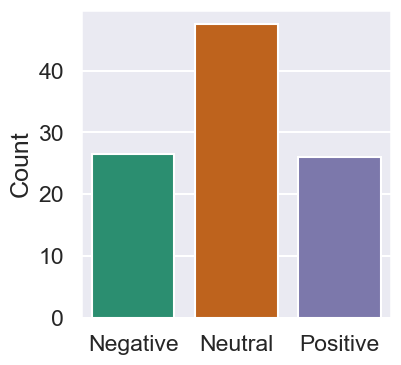

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [29]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [30]:
from nltk.tokenize import word_tokenize
import string

def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])


In [31]:
df['Ireland_UK'] = df['Ireland_UK'].apply(get_text_processing)


In [32]:
df.head()

,neg,neu,pos,compound,Ireland_UK,label
0,0.000,0.755,0.245,0.3818,Dan OBrien Twitter housing price growth decele...,1
1,0.027,0.736,0.237,0.9827,housing price crash coming idea stuff works pa...,1
2,0.000,1.000,0.000,0.0000,Irish house prices rise 89 first three months ...,0
3,0.000,1.000,0.000,0.0000,Third consecutive month house price declines D...,0
4,0.000,1.000,0.000,0.0000,House Prices Inflation,0


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(binary=True)

In [34]:
vect = CountVectorizer()
X = vect.fit_transform(df.Ireland_UK)

X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
from sklearn.model_selection import train_test_split

X = df.Ireland_UK
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:

X_train_vect = vect.fit_transform(X_train)

In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

In [38]:
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(-1, 3823), (0, 3823), (1, 3823)]


In [42]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

0.9577514273166448

In [43]:
X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array([-1,  1, -1, ..., -1,  1, -1])

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


X = df.Ireland_UK
y = df.label

ss = ShuffleSplit(n_splits=10, test_size=0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []

for train_index, test_index in ss.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # vectorization on training and test
    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    # smote
    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)
    
    # fir the model and prediction
    nb.fit(X_train_res, y_train_res)
    y_pred = nb.predict(X_test_vect)
    
    # determine average accracy score across folders
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred,average='macro'))
    cms.append(confusion_matrix(y_test, y_pred))

    
print("Average accuracy: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("Average F1 score: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("Average Confusion : \n {}".format(sum(cms) / len(cms)))

Average accuracy: 96.42%
Average F1 score: 96.29%
Average Confusion : 
 [[531.    0.    0. ]
 [  0.  942.2   0. ]
 [  3.7  67.9 455.2]]


# comparison between ireland and uk

In [48]:
UK_sj = pd.read_json('UK_save.json')

In [49]:
Ireland_sj = pd.read_json('Ireland_save.json')

In [50]:
Ireland_UK = pd.concat([Ireland_sj, UK_sj], ignore_index=True)

In [51]:
Ireland_UK['all_text'] = Ireland_UK['title'] + ' ' + Ireland_UK['selftext']
Ireland_UK.drop(columns=['title','selftext'])

,subreddit,created_utc,id,kind,all_text
0,ireland,2022-05-16T11:54:09Z,uqt5hf,t3,Dan O'Brien on Twitter re housing price growth...
1,ireland,2022-04-20T13:17:23Z,u7v60i,t3,Is a housing price crash coming? I have no ide...
2,ireland,2023-05-11T11:53:51Z,13ejsvy,t3,Irish house prices rise 8.9% in first three mo...
3,ireland,2023-05-17T12:16:03Z,13jyrhv,t3,Third consecutive month of house price decline...
4,ireland,2023-03-29T15:43:10Z,125q8tn,t3,House Prices and Inflation
...,...,...,...,...,...
9995,unitedkingdom,2022-04-07T13:20:31Z,tybubq,t3,House price rise since first lockdown revealed
9996,unitedkingdom,2021-05-01T10:26:03Z,n2exto,t3,UK house prices increase at fastest rate since...
9997,unitedkingdom,2014-04-13T21:30:29Z,22y4jw,t3,Yougov: Londoners blame rich foreigners for ho...
9998,unitedkingdom,2021-11-17T23:35:07Z,qwc1at,t3,Second homes: Man fears house prices could rui...


In [52]:
sia = SIA()
results = []

for line in Ireland_UK['all_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['Polarity_score'] = line
    results.append(pol_score)

In [53]:
df = pd.DataFrame.from_records(results)

In [54]:
Ireland_UK = Ireland_UK.merge(df, left_index=True, right_index=True)

In [55]:
Ireland_UK=Ireland_UK[['subreddit','compound']]

In [56]:
Ireland_UK.head()

,subreddit,compound
0,ireland,0.3818
1,ireland,0.9827
2,ireland,0.0000
3,ireland,0.0000
4,ireland,0.0000


In [57]:

Ireland_UK['label'] = 0
Ireland_UK.loc[df['compound'] > 0.2, 'label'] = 1
Ireland_UK.loc[df['compound'] < -0.2, 'label'] = -1


In [58]:
Ireland_UK.drop(columns='compound')

,subreddit,label
0,ireland,1
1,ireland,1
2,ireland,0
3,ireland,0
4,ireland,0
...,...,...
9995,unitedkingdom,0
9996,unitedkingdom,1
9997,unitedkingdom,1
9998,unitedkingdom,-1


In [59]:
# creation of pivot with country and polarity

counts = Ireland_UK.pivot_table(index='subreddit', columns='label', aggfunc='size', fill_value=0)

# Rename columns
counts = counts.rename(columns={-1: '-1', 0: '0', 1: '1'})

print(counts)

label            -1     0     1
subreddit                      
ireland        1050  2550  1400
unitedkingdom  1600  2200  1200


In [60]:
counts.reset_index()

label,subreddit,-1,0,1
0,ireland,1050,2550,1400
1,unitedkingdom,1600,2200,1200


In [61]:
import scipy.stats as stats

#  chi-quadro test to evaluate countries differences
chi2, p_value, _, _ = stats.chi2_contingency(counts)

# results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


Chi-square statistic: 155.3250324650523
p-value: 1.8689502867525888e-34
